In [72]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
from torchvision import datasets, transforms

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print('CUDA is not available. Training on CPU.')
else:
  print('CUDA is available. Training on GPU.')

CUDA is available. Training on GPU.


In [73]:
# imshow function for displaying images
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [74]:
# dataset directory
data_dir = r'C:\Users\tpasl\Downloads\archive'

titles = ["Alexandrite", "Amazonite", "Amethyst", "Aventurine Yellow",
          "Beryl Golden", "Bloodstone", "Blue Lace Agate", "Carnelian",
          "Chrome Diopside", "Citrine", "Diamond", "Emerald", "Hessonite",
          "Iolite", "Kunzite", "Kyanite", "Lapis Lazuli", "Larimar",
          "Malachite", "Morganite", "Onyx Black", "Opal", "Pearl",
          "Peridot", "Pyrope", "Quartz Lemon", "Quartz Rose", "Rhodolite",
          "Ruby", "Sapphire Blue", "Sapphire Pink", "Sapphire Purple",
          "Sapphire Yellow", "Spessarite", "Sphene", "Sunstone",
          "Tanzanite", "Tigers Eye", "Topaz", "Tourmaline", "Tsavorite"]
# define batch size
batch_size = 48

# define transforms (colour)
# define transforms
# training (with random flips and rotation)
train_transform = transforms.Compose([transforms.Resize(236), # resize to 236x?
                                transforms.RandomRotation(5), # random rotation
                                transforms.CenterCrop(224), # take a square (224x224) crop from the centre
                                transforms.RandomHorizontalFlip(), # randomly flip on horizontal axis
                                transforms.ToTensor(), # convert data to torch.FloatTensor
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]) # normalise for each colour channel)

# validation and testing
transform = transforms.Compose([transforms.Resize(224), # resize to 224x?
                                transforms.CenterCrop(224), # take a square (224x224) crop from the centre
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])# convert data to torch.FloatTensor
                                ]) # normalise for each colour channel
# choose the training, validation and test datasets
train_data = datasets.ImageFolder(data_dir + '/Training', transform=transform)
val_data = datasets.ImageFolder(data_dir + '/Validation', transform=transform)
test_data = datasets.ImageFolder(data_dir + '/Testing', transform=transform)

# prepare the data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size, shuffle=True)

torch.Size([48])
torch.Size([48])
torch.Size([48])


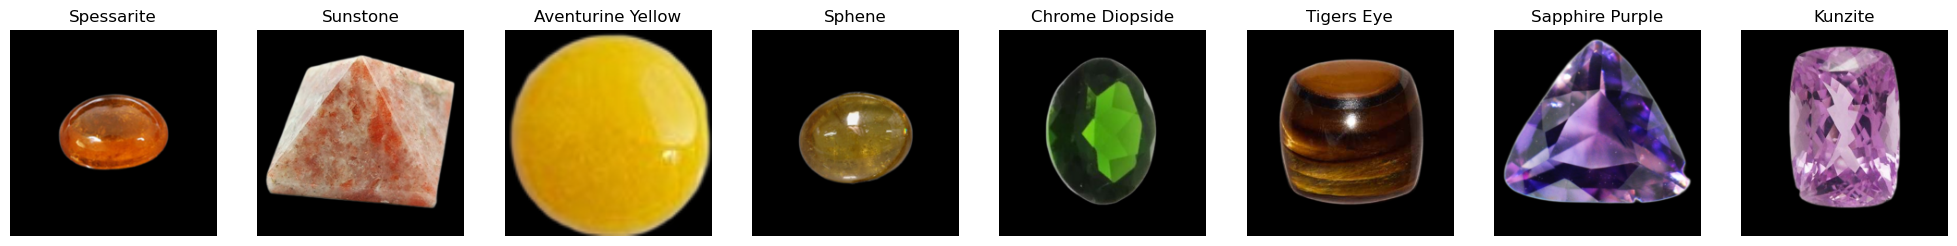

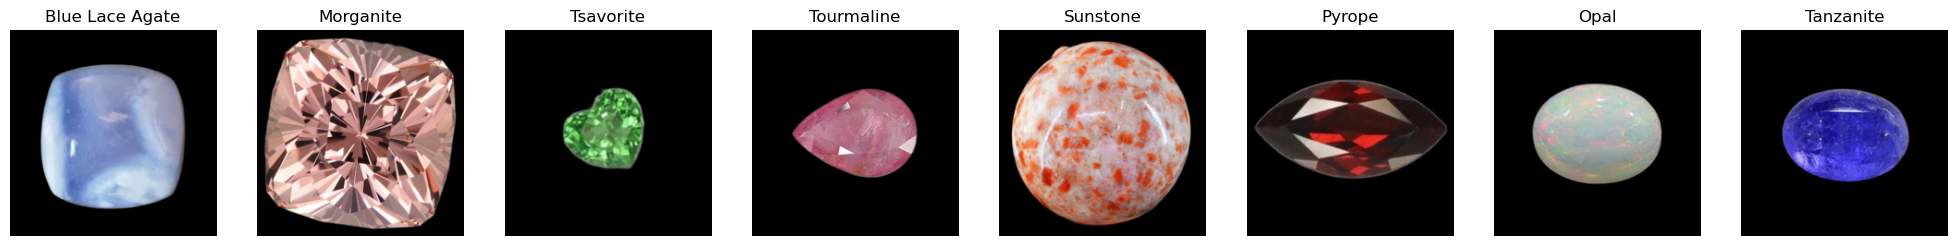

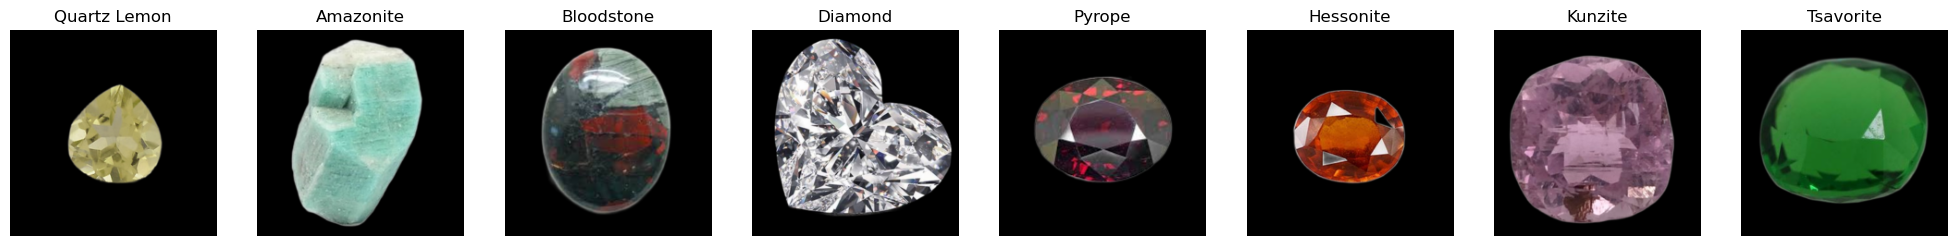

In [75]:
for x in range(3):
# obtain one batch of training images
  data_iter = iter(train_loader)
  images, labels = next(data_iter)

  print(labels.shape)

# plot the first 4 images in the batch, along with the corresponding labels
  fig, axes = plt.subplots(figsize=(25,8), ncols=8)
  for ii in range(8):
      ax = axes[ii]
      imshow(images[ii], ax=ax, normalize=True)
      ax.set_title(titles[labels[ii].item()]) 
# 0 is Lion's mane Jellyfish, 1 is Moon Jellyfish, 2 is Pacific Sea Nettle, 3 is White spotted Jellyfish

In [76]:
#########################################################################
# use a ResNet18 network
# #########################################################################
# NB This network requires an image input size of 3x224x224 and normalised using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

import torch.nn as nn
import torchvision.models as models

# load a pre-trained ResNet network with 18 layers
model = models.resnet18(pretrained=True)

# # if we use the following code the pre-trained weights are frozen and we only update the final layer
# for param in model.parameters():
#     param.requires_grad = False

# get the number of inputs for the final layer (fc) of the network
num_ftrs = model.fc.in_features
# replace the final layer so that the output is number of classes
model.fc = nn.Linear(num_ftrs, 41)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    CUDA_LAUNCH_BLOCKING=1
    model.cuda()

print(model)

# #########################################################################
# #########################################################################

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [77]:
import torch.optim as optim

# specify loss function (cross entropy loss)
criterion = nn.CrossEntropyLoss()
# specify optimizer (Adam optimiser) and learning rate = 0.003
optimizer = optim.Adam(model.parameters(), lr=0.0003)

In [78]:
# number of epochs to train the model
n_epochs = 30
# initialise tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

# create empty lists to store the training and validation losses
train_losses, val_losses = [], []

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in val_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(val_loader.sampler)

    # store the training and validation losses for later visualisation
    train_losses.append(train_loss)
    val_losses.append(valid_loss)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'resnet18_model_fine_tune_aug.pt') # save in colab
       # torch.save(model.state_dict(), '/content/gdrive/MyDrive/resnet18_model_fine_tune_aug.pt') # save in google drive
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.793678 	Validation Loss: 1.179260
Validation loss decreased (inf --> 1.179260).  Saving model ...
Epoch: 2 	Training Loss: 0.514404 	Validation Loss: 1.069555
Validation loss decreased (1.179260 --> 1.069555).  Saving model ...
Epoch: 3 	Training Loss: 0.268363 	Validation Loss: 1.056019
Validation loss decreased (1.069555 --> 1.056019).  Saving model ...
Epoch: 4 	Training Loss: 0.135345 	Validation Loss: 1.192841
Epoch: 5 	Training Loss: 0.074369 	Validation Loss: 0.905208
Validation loss decreased (1.056019 --> 0.905208).  Saving model ...
Epoch: 6 	Training Loss: 0.048021 	Validation Loss: 0.839549
Validation loss decreased (0.905208 --> 0.839549).  Saving model ...
Epoch: 7 	Training Loss: 0.052006 	Validation Loss: 1.207943
Epoch: 8 	Training Loss: 0.035372 	Validation Loss: 1.251069
Epoch: 9 	Training Loss: 0.033093 	Validation Loss: 1.152749
Epoch: 10 	Training Loss: 0.033541 	Validation Loss: 1.073729
Epoch: 11 	Training Loss: 0.075163 	Validation Lo

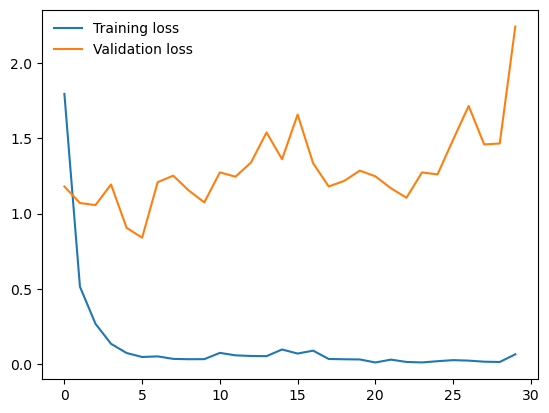

In [79]:
# Visualise the training and validation losses over time
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)

In [80]:
# Load the Model with the Lowest Validation Loss
model.load_state_dict(torch.load('resnet18_model_fine_tune_aug.pt'))

<All keys matched successfully>

In [81]:
# Test the Trained Network

# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(41))
class_total = list(0. for i in range(41))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

# change value here to number of classes
for i in range(41):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.599764

Test Accuracy of     0: 83% ( 5/ 6)
Test Accuracy of     1: 87% ( 7/ 8)
Test Accuracy of     2: 87% ( 7/ 8)
Test Accuracy of     3: 100% ( 8/ 8)
Test Accuracy of     4: 75% ( 6/ 8)
Test Accuracy of     5: 100% ( 8/ 8)
Test Accuracy of     6: 100% ( 8/ 8)
Test Accuracy of     7: 100% ( 8/ 8)
Test Accuracy of     8: 50% ( 4/ 8)
Test Accuracy of     9: 50% ( 4/ 8)
Test Accuracy of    10: 100% ( 8/ 8)
Test Accuracy of    11: 100% ( 8/ 8)
Test Accuracy of    12: 75% ( 6/ 8)
Test Accuracy of    13: 100% ( 8/ 8)
Test Accuracy of    14: 75% ( 6/ 8)
Test Accuracy of    15: 75% ( 3/ 4)
Test Accuracy of    16: 100% ( 8/ 8)
Test Accuracy of    17: 100% ( 8/ 8)
Test Accuracy of    18: 87% ( 7/ 8)
Test Accuracy of    19: 75% ( 6/ 8)
Test Accuracy of    20: 87% ( 7/ 8)
Test Accuracy of    21: 100% ( 8/ 8)
Test Accuracy of    22: 87% ( 7/ 8)
Test Accuracy of    23: 87% ( 7/ 8)
Test Accuracy of    24: 62% ( 5/ 8)
Test Accuracy of    25: 62% ( 5/ 8)
Test Accuracy of    26: 87% ( 7/ 

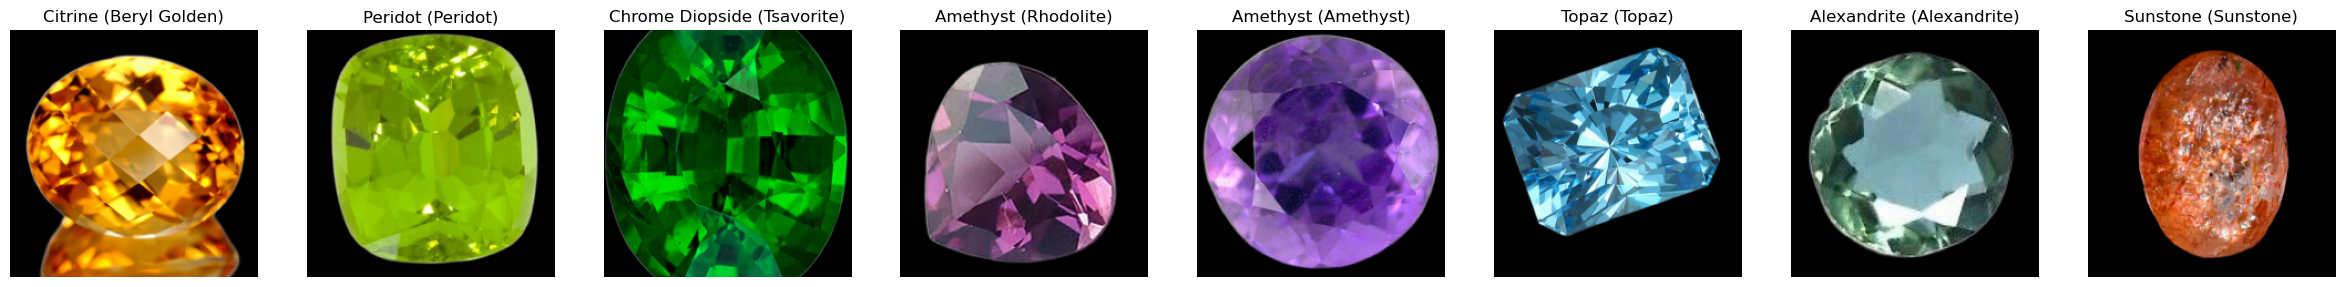

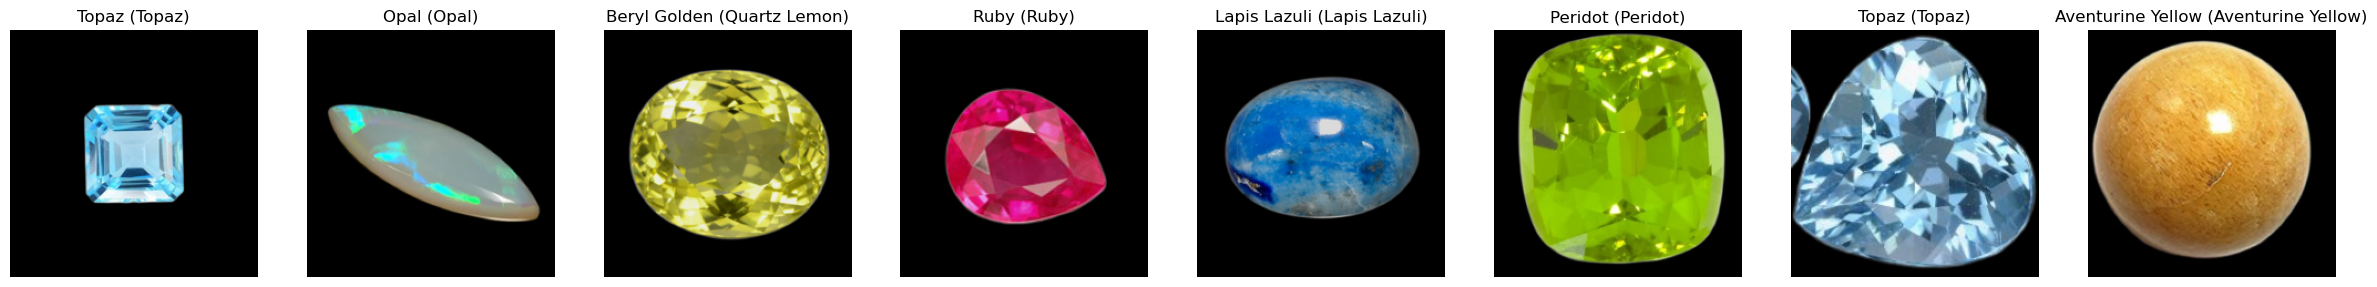

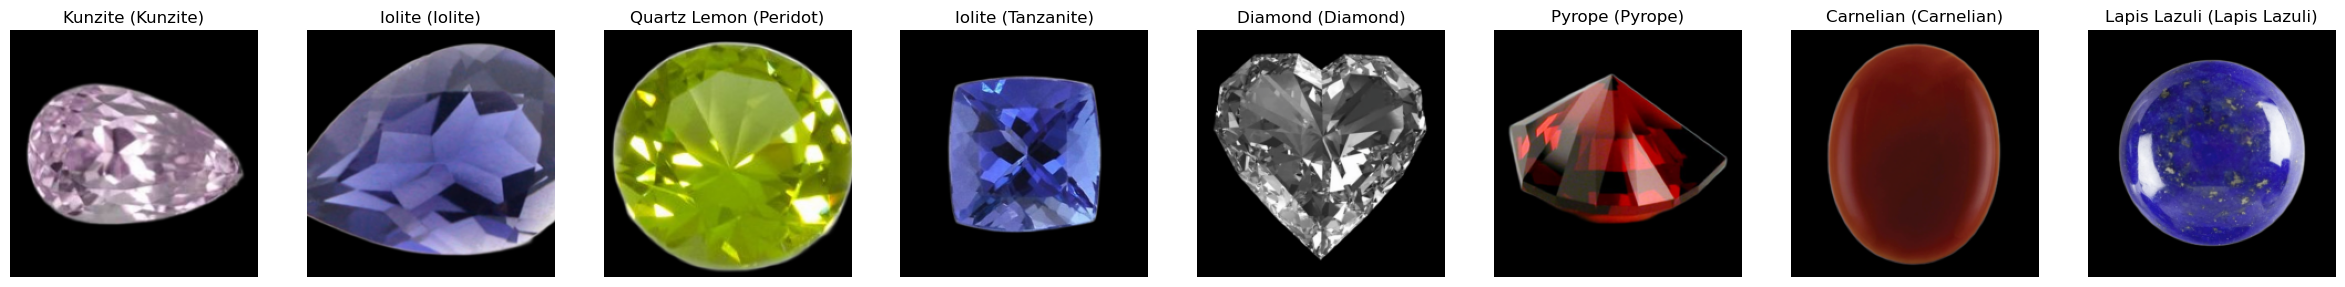

In [82]:


for x in range(3):
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images.numpy()

    # move model inputs to cuda, if GPU available
    if train_on_gpu:
        images = images.cuda()

    # get sample outputs
    output = model(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

    # plot the first 4 images in the batch, along with the corresponding labels
    fig, axes = plt.subplots(figsize=(30,10), ncols=8)
    for ii in range(8):
        ax = axes[ii]
        imshow(images.cpu()[ii], ax=ax, normalize=True)
        ax.set_title("{} ({})".format(titles[preds[ii].item()], titles[labels[ii].item()],
                     color=("green" if titles[preds[ii].item()]==titles[labels[ii].item()] else "red"))) 